#EXAMEN EDA
Alumna : Angie Vargas Matarrita


In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

In [ ]:
path="/content/netflix_titles.csv"
data = pd.read_csv(path)
data.head().all()


show_id         True
type            True
title           True
director        True
cast            True
country         True
date_added      True
release_year    True
rating          True
duration        True
listed_in       True
description     True
dtype: bool

#Carga y Visualización Inicial:


● ¿Cuántas filas y columnas tiene el dataset "netflix_titles.csv"?

In [ ]:
# Obtener el número de filas y columnas
num_filas = data.shape[0]
num_columnas = data.shape[1]

# Imprimir el número de filas y columnas
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 7787
Número de columnas: 12


● Muestra las primeras y últimas 5 filas del dataset. ¿Qué tipo de
información contiene?

In [ ]:
#Que contiene
print('Contiene los datos de ID del show, tipo de pelicula, nombre del director, elenco, pais,fecha de adicion, raiting, etc')
# Mostrar las primeras 5 filas
print(data.head(6))

# Mostrar las últimas 5 filas
print(data.tail(6))



Contiene los datos de ID del show, tipo de pelicula, nombre del director, elenco, pais,fecha de adicion, raiting, etc
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year rating   dur

#Limpieza y Preprocesamiento de Datos:

● Identifica las columnas que tienen valores faltantes y la cantidad de
valores faltantes en cada una

In [ ]:
df = pd.DataFrame(data)

# Identificar columnas con valores faltantes y contar la cantidad de valores faltantes en cada una
valores_faltantes = df.isnull().sum()

# Mostrar los resultados
print("Columnas con valores faltantes y cantidad de valores faltantes:")
print(valores_faltantes)

Columnas con valores faltantes y cantidad de valores faltantes:
show_id                  0
type                     0
title                    0
director              2389
cast                   718
country                507
date_added              10
release_year             0
rating                   7
duration                 0
listed_in                0
description              0
duracion_categoria    2410
dtype: int64


● Elige una columna con valores faltantes y propón una estrategia para
tratar estos valores (por ejemplo, eliminación, imputación, etc.).
Justifica tu elección.


In [ ]:
#Estrategia para corregir los nulos en la columna de Director, cambiarlas por 'Desconocido'
data['director'].fillna('Desconocido', inplace=True)
print('Elegi cambiar los datos vacíos de la columna director por que me parece bien cambiarlo por desconocido')

Elegi cambiar los datos vacíos de la columna director por que me parece bien cambiarlo por desconocido


#Análisis Descriptivo:
● ¿Cuáles son los cinco países con la mayor cantidad de títulos en el
dataset?


In [ ]:
# Agrupar los datos por país y contar los títulos
data_grouped = data.groupby('country').count()

# Ordenar los datos por número de títulos en orden descendente
data_sorted = data_grouped.sort_values('title', ascending=False)

# Obtener los cinco primeros países
top_five_countries = data_sorted.head(5)

# Imprimir los resultados
print(f'los cinco paises con mayor catidad de titulos son:')
print(f'{top_five_countries}')

los cinco paises con mayor catidad de titulos son:
                show_id  type  title  director  cast  date_added  \
country                                                            
United States      2555  2555   2555      1838  2251        2549   
India               923   923    923       848   894         923   
United Kingdom      397   397    397       201   332         396   
Japan               226   226    226        78   222         225   
South Korea         183   183    183        44   180         183   

                release_year  rating  duration  listed_in  description  
country                                                                 
United States           2555    2552      2555       2555         2555  
India                    923     923       923        923          923  
United Kingdom           397     397       397        397          397  
Japan                    226     225       226        226          226  
South Korea              183     1

● ¿Cuál es la proporción de películas frente a series de televisión en el
dataset?


In [ ]:
proporcion = data['type'].value_counts(normalize=True)
print(f'La proporcion de series peliculas frente a las series de television es la siguiente:\n {proporcion}')

La proporcion de series peliculas frente a las series de television es la siguiente:
 Movie      0.69051
TV Show    0.30949
Name: type, dtype: float64


#Visualización de Datos:
● Crea un gráfico de barras que muestre el número de títulos (películas y
series de TV) lanzados cada año. ¿Observas alguna tendencia?

In [ ]:
import plotly.express as px
fig = px.histogram(data, x='release_year', color='type', title='Número de títulos lanzados cada año',
                   labels={'release_year': 'Año de lanzamiento', 'type': 'Tipo de contenido'},
                   barmode='overlay', nbins=20)
fig.update_layout(bargap=0.2)
fig.show()
print('Se puede observar la tendencia de aumento antes y después de 2020, por la pandemia')

Se puede observar la tendencia de aumento antes y después de 2020, por la pandemia


● Crea un diagrama de caja para visualizar la distribución de la duración
de las películas en el dataset.



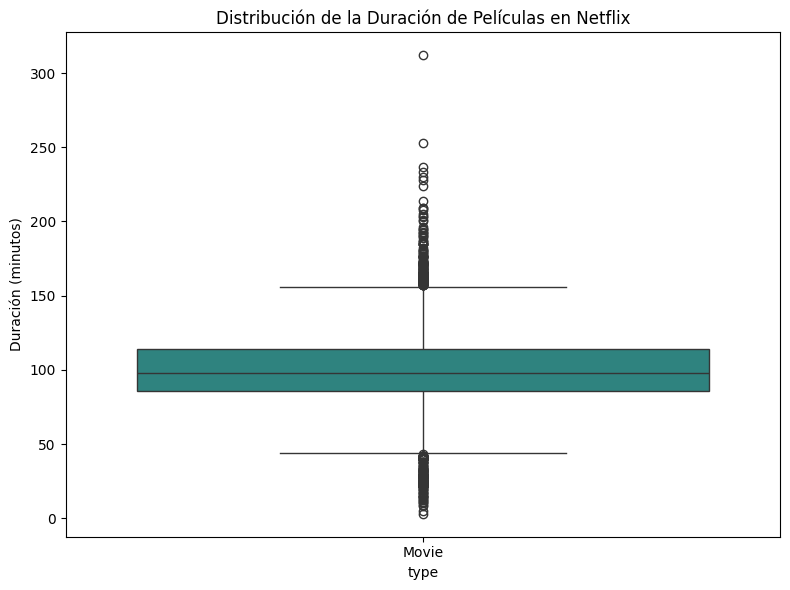

In [145]:

# Filtrar solo las películas utilizando .loc
peliculas = data.loc[data['type'] == 'Movie'].copy()

# Convertir la columna 'duration' a string si no lo es
peliculas['duration'] = peliculas['duration'].astype(str)

# Extraer los minutos de la columna 'duration' y convertir a float
peliculas['duration'] = peliculas['duration'].str.extract('(\d+)').astype(float)

# Agregar una nueva columna 'duracion_categoria' al DataFrame original utilizando .loc
data.loc[data['type'] == 'Movie', 'duration'] = peliculas['duration']
data.loc[data['type'] == 'Movie', 'duracion_categoria'] = pd.cut(peliculas['duration'], bins=[0, 30, 60, 90, 120, float('inf')], labels=['0-30', '31-60', '61-90', '91-120', '121+'])

# Crear un diagrama de caja utilizando seaborn y asignar 'type' a 'hue'
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='duration', data=peliculas, palette='viridis', hue='type', legend=False)
plt.ylabel('Duración (minutos)')
plt.title('Distribución de la Duración de Películas en Netflix')
plt.tight_layout()
plt.show()

#Análisis de Categorías:
● ¿Cuáles son los tres géneros más comunes en Netflix según este
dataset?


In [ ]:
#top 3 géneros mas comunes
top_generos = data['listed_in'].value_counts().head(3)
print("Los tres géneros más comunes en Netflix son: \n",top_generos)



Los tres géneros más comunes en Netflix son: 
 Documentaries                   334
Stand-Up Comedy                 321
Dramas, International Movies    320
Name: listed_in, dtype: int64


¿Hay diferencias en la duración promedio de las películas entre los tres
géneros más comunes?


In [ ]:
# Obtener los tres géneros más comunes
top_genres = data['listed_in'].value_counts().head(3).index

# Filtrar por los tres géneros más comunes
top_genres_data = data[data['listed_in'].isin(top_genres)].copy()  # Añadir .copy() para evitar la vista

# Convertir la columna 'duration' a valores numéricos
top_genres_data['duration'] = top_genres_data['duration'].str.extract('(\d+)').astype(float)

# Calcular las duraciones promedio por género
average_duration_by_genre = top_genres_data.groupby('listed_in')['duration'].mean()

# Mostrar resultados
print('Si hay diferencias')
print("Duración promedio de películas por género:")
for genre, duration in average_duration_by_genre.items():
    print(f"{genre}: {duration:.2f} minutos")

Si hay diferencias
Duración promedio de películas por género:
Documentaries: 79.90 minutos
Dramas, International Movies: 113.52 minutos
Stand-Up Comedy: 66.61 minutos


#ANALISIS ADICIONAL

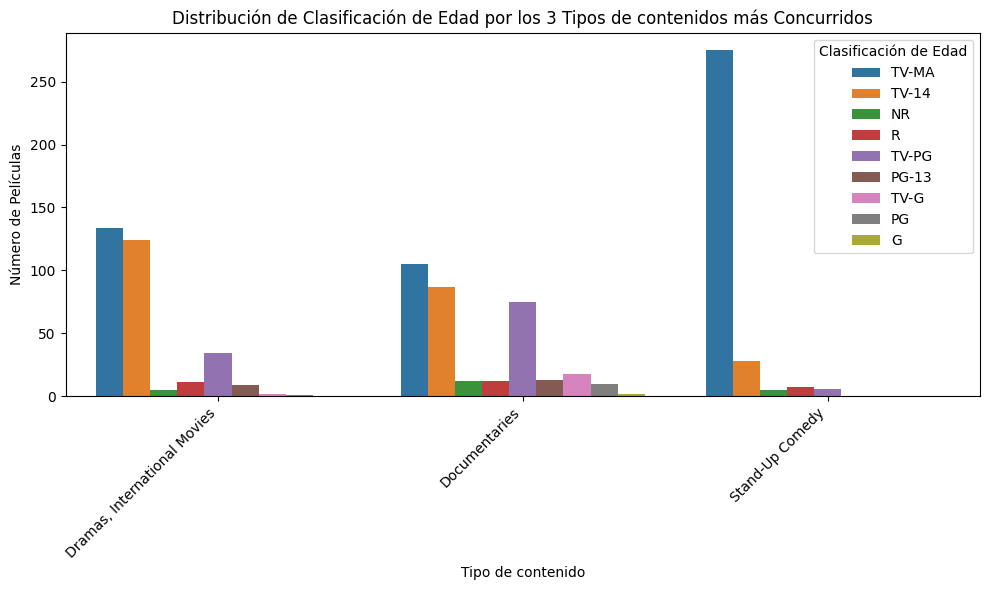

In [ ]:
df = pd.DataFrame(data)

# Obtener los 5 géneros principales
top_genres = df['listed_in'].value_counts().head(3).index

# Filtrar el DataFrame para incluir solo los 5 géneros principales
df_top_genres = df[df['listed_in'].isin(top_genres)]

# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(x='listed_in', hue='rating', data=df_top_genres)
plt.title('Distribución de Clasificación de Edad por los 3 Tipos de contenidos más Concurridos')
plt.xlabel('Tipo de contenido')
plt.ylabel('Número de Películas')
plt.legend(title='Clasificación de Edad', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

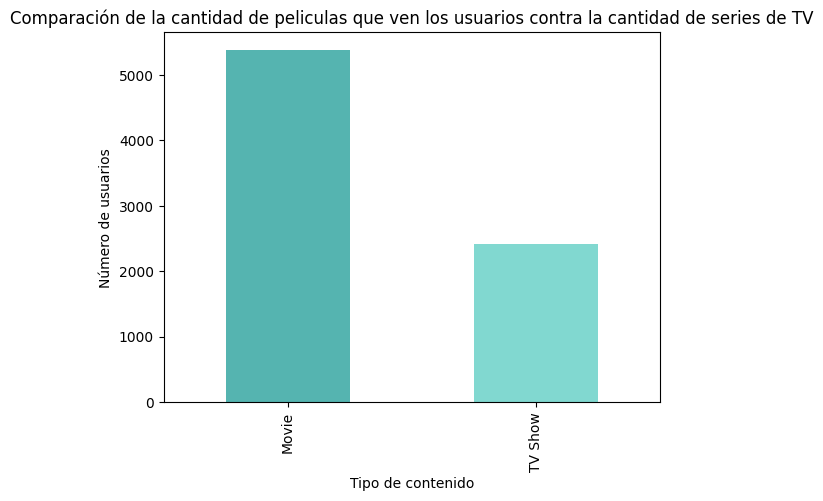

In [ ]:
#Otra manera de llamar a los colores es usar códigos hexadecimales
colors = ['#55B4B0', '#81D8D0']

# Crear una figura y un eje
fig, ax = plt.subplots()

# Generar el gráfico de barras con la paleta de colores
df['type'].value_counts().plot(kind='bar', color=colors, ax=ax)

# Configurar el título y los ejes
ax.set_title("Comparación de la cantidad de peliculas que ven los usuarios contra la cantidad de series de TV")
ax.set_xlabel("Tipo de contenido")
ax.set_ylabel("Número de usuarios")

# Mostrar el gráfico
plt.show()


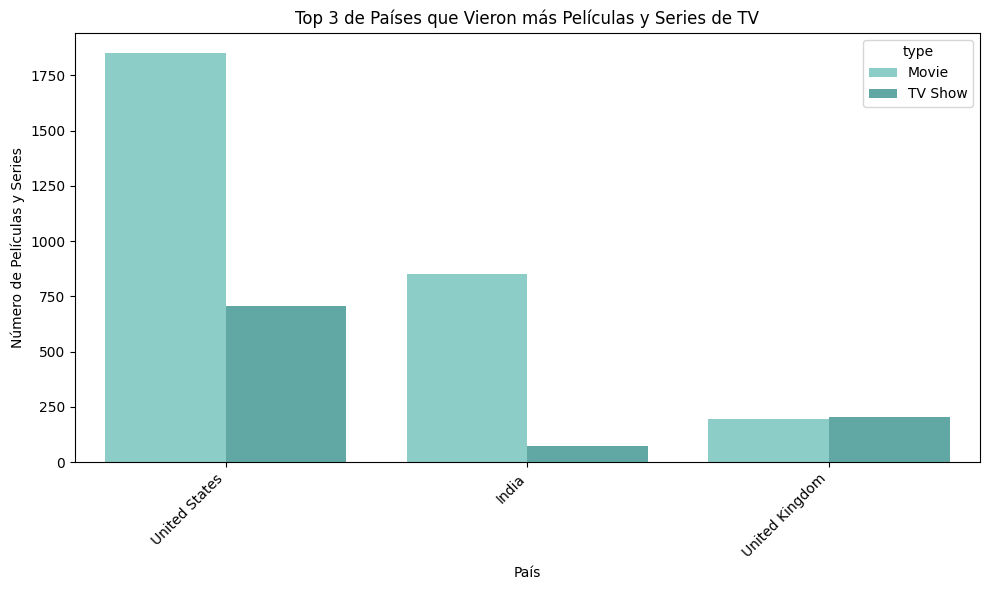

In [ ]:
df = pd.DataFrame(data)

# Obtener el top 3 de países
top_paises = df['country'].value_counts().head(3).index

# Filtrar el DataFrame para incluir solo el top 3 de países
df_top_paises = df[df['country'].isin(top_paises)]
# Definir un diccionario de colores personalizado
colores = {'Movie': '#81D8D0', 'TV Show': '#55B4B0'}
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='country', hue='type', data=df_top_paises, palette=colores)
plt.title('Top 3 de Países que Vieron más Películas y Series de TV')
plt.xlabel('País')
plt.ylabel('Número de Películas y Series')
plt.legend(title='type', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
 #Obtener el top 3 de tipos de contenido por año
top_release_years = df['release_year'].value_counts().head(3).index
top_movie_types = df['listed_in'].value_counts().head(3).index

# Filtrar el DataFrame original para incluir solo el top 3 de release_year y listed_in
df_top_years_types = df[df['release_year'].isin(top_release_years) & df['listed_in'].isin(top_movie_types)]

# Crear la crosstab
crosstab_result = pd.crosstab(df_top_years_types['release_year'], df_top_years_types['listed_in'])

# Mostrar los resultados
print('Top 3 Tipos de contenido más producidos y años que hubo mayor producción:')
print(crosstab_result)

Top 3 Tipos de contenido más producidos y años que hubo mayor producción:
listed_in     Documentaries  Dramas, International Movies  Stand-Up Comedy
release_year                                                              
2017                     90                            47               57
2018                     54                            35               58
2019                     32                            32               47


#Conclusiones:
● Basándote en tu análisis, resume tres hallazgos interesantes o
sorprendentes sobre el contenido de Netflix.


Hallazgos:

*  Según mis hallazgos pude notar que en cuanto a la clasificatoria de rangos etáreos de los usuarios, los que más consumen contenido son los Mayores de edad, seguido por quienes son mayores de 14 años.
*   También encontré que a nivel general los usuarios prefieren ver películas en vez de series de TV.


*  En cuanto al top 3 países con más vistas de contenido, se cumple lo anteriormente mencionado en los países que ocupan los dos primeros lugares que son USA e India, sin embargo en el 3er puesto que es Reino Unido, esto cambia, siendo la preferencia por ver series de TV levemente mayor a ver películas.
*  Por último, en los años que más se produjo contenido fue en 2017, 2018 y 2019, siendo los géneros más producidos los de: "Documentaries drama","International movies" y "Stand-up comedy"









● ¿Cuáles son las limitaciones de tu análisis? ¿Hay algo más que te
gustaría explorar si tuvieras más datos o tiempo?

Quizá algunas limitaciones pueden ser los campos vacíos que hacen que sea más complejo el análisis de las diferentes variables, con más tiempo me hubiera gustado obtener más datos estadísticos especializados